In [1]:
import tweepy       # python wrapper for twitter api
import json
import time
import requests
# step 0, get your own twitter credentials!

In [2]:
# this is my own personal twitter api information
# if you could be so kind as to sign up yourself on both twitter and mashape that'd be great :)
# It's FREEEEEEE
api_key = '21NZW9pxtV8dzkoxA2uUTKVku'
api_secret = 'uwoi6SWshYdqMP3lFu56flQU8fOpFAPINK7qNK3K6OYjL2pIgN'
access_token = '4397856207-wjba91DNyODJE744BHbx2sQOxrMr3y5VNfHTJId'
access_secret = 'zpix59ydHsC2MC0XygVQmygRRVXjSMKh0KumeCF5ySGkO'

In [3]:
# Documentation is your friend! http://docs.tweepy.org/en/v3.1.0/
auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth) # returns a tweepy authorization handler object

In [4]:
# 1. Use Twitter API to stream and store tweets (300 per candidate)
# explain geocode is doing
#geocode is getting tweets from within 50 miles of your location so in my case, Oakland and surrounding areas. i upped it to 150 to pull in more tweets 
bernie_tweets =  api.search(q="#berniesanders", count=100, geocode="37.843360, -122.267769,150mi") + api.search(q='#bernie', count=100, geocode="37.843360, -122.267769,150mi") + api.search(q='#FeelTheBern', count=100, geocode="37.781157,-122.398720,150mi")
hilary_tweets = api.search(q='#ImWithHer', count=100, geocode="37.843360, -122.267769,150mi") + api.search(q='#hillaryclinton', count=100, geocode="37.843360, -122.267769,150mi") + api.search(q='#hillary2016', count=100, geocode="37.781157,-122.398720,150mi")
the_donald_tweets = api.search(q='#donaldtrump', count=100, geocode="37.843360, -122.267769,150mi") + api.search(q='#trump2016', count=100, geocode="37.843360, -122.267769,150mi") + api.search(q='#trump', count=100, geocode="37.781157,-122.398720,150mi") + api.search(q='#makeamericagreatagain', count=100, geocode="37.781157,-122.398720,150mi")

In [5]:
the_donald_tweets[0]

Status(contributors=None, truncated=False, text=u'@CNNPolitics that #ExHillaryaide he must be an #ExAide for a reason.He knows nothing.He is so wrong about #Hillary. #Trump will not win.', is_quote_status=False, in_reply_to_status_id=None, id=731191958048100352, favorite_count=0, _api=<tweepy.api.API object at 0x1049cef10>, author=User(follow_request_sent=False, has_extended_profile=True, profile_use_background_image=True, _json={u'follow_request_sent': False, u'has_extended_profile': True, u'profile_use_background_image': True, u'default_profile_image': False, u'id': 713161875760947200, u'profile_background_image_url_https': None, u'verified': False, u'profile_text_color': u'333333', u'profile_image_url_https': u'https://pbs.twimg.com/profile_images/714158225663336449/7-3DBFjg_normal.jpg', u'profile_sidebar_fill_color': u'DDEEF6', u'entities': {u'description': {u'urls': []}}, u'followers_count': 43, u'profile_sidebar_border_color': u'C0DEED', u'id_str': u'713161875760947200', u'profil

In [6]:
# wrappers come with built in python attributes and methods!
print dir(the_donald_tweets[0])

['__class__', '__delattr__', '__dict__', '__doc__', '__eq__', '__format__', '__getattribute__', '__getstate__', '__hash__', '__init__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'metadata', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [7]:
print the_donald_tweets[0].created_at
print the_donald_tweets[0].text
print the_donald_tweets[0].favorite_count
print the_donald_tweets[0].favorited
print the_donald_tweets[0].lang
print the_donald_tweets[0].geo
print the_donald_tweets[0].retweet_count
print the_donald_tweets[0].retweeted
print the_donald_tweets[0].possibly_sensitive
print the_donald_tweets[0].coordinates

2016-05-13 18:38:42
@CNNPolitics that #ExHillaryaide he must be an #ExAide for a reason.He knows nothing.He is so wrong about #Hillary. #Trump will not win.
0
False
en
None
0
False


AttributeError: 'Status' object has no attribute 'possibly_sensitive'

In [8]:
def parse_status_objects(tweet_list):
    modified_tweets = list()
    for x in tweet_list:
        modified_tweets.append( [
                    x.created_at,
                    x.text,
                    x.favorite_count,
                    x.favorited,
                    x.lang,
                    x.geo,
                    x.retweet_count,
                    x.retweeted,
                    x.coordinates
                ])
    return modified_tweets
        
hilary_tweets = parse_status_objects(hilary_tweets)
the_donald_tweets = parse_status_objects(the_donald_tweets)
bernie_tweets = parse_status_objects(bernie_tweets)

In [9]:
print bernie_tweets[0]
print the_donald_tweets[0]
print hilary_tweets[0]

[datetime.datetime(2016, 5, 13, 18, 43, 18), u"#FEELTHEBERN (https://t.co/up4A8yQTkr) PPact THIS is why we're at #PowerofPink. The only way to stop extremists \u2026 https://t.co/TAyuwDAO6u", 0, False, u'en', None, 0, False, None]
[datetime.datetime(2016, 5, 13, 18, 38, 42), u'@CNNPolitics that #ExHillaryaide he must be an #ExAide for a reason.He knows nothing.He is so wrong about #Hillary. #Trump will not win.', 0, False, u'en', None, 0, False, None]
[datetime.datetime(2016, 5, 13, 18, 13, 22), u'Donald Trump is a narcissistic, sociopathic, egomaniac w/ a napolean complex. #Trump2016 #Sanders2016  #Hillary2016 https://t.co/0LxtpapNyh', 0, False, u'en', None, 0, False, None]


In [10]:
# 2 Create a dataframe that combines all of the tweets from each candidate
# To do so, you will need to concat the data frames
# so each row is a tweet and your columns should be 
# date, text, favorite_count,favorited, language, geocode, rwtweet count, retweeted, coordinates

In [11]:
import pandas as pd

In [12]:
bernie = pd.DataFrame(bernie_tweets)
donald = pd.DataFrame(the_donald_tweets)
hillary = pd.DataFrame(hilary_tweets)

In [13]:
bernie.columns = ['date', 'text', 'favorite_count','favorited', 'language', 'geocode', 'retweet_count', 'retweeted', 'coordinates']
donald.columns = ['date', 'text', 'favorite_count','favorited', 'language', 'geocode', 'retweet_count', 'retweeted', 'coordinates']
hillary.columns = ['date', 'text', 'favorite_count','favorited', 'language', 'geocode', 'retweet_count', 'retweeted', 'coordinates']

In [14]:
bernie['democrat'] = 1
donald['democrat'] = 0
hillary['democrat'] = 1

In [15]:
bernie['candidate'] = 1
donald['candidate'] = 2
hillary['candidate'] = 3

In [16]:
hillary.head()

,date,text,favorite_count,favorited,language,geocode,retweet_count,retweeted,coordinates,democrat,candidate
0,2016-05-13 18:13:22,"Donald Trump is a narcissistic, sociopathic, e...",0,False,en,None,0,False,None,1,3
1,2016-05-13 17:06:54,RT @GaiaLibra: Retweeted Jeanette Sandernista ...,0,False,en,None,3,False,None,1,3
2,2016-05-13 17:04:35,RT @jgsf1987: Retweeted Jeanette Sandernista (...,0,False,en,None,15,False,None,1,3
3,2016-05-13 17:02:38,RT @jgsf1987: Retweeted Jeanette Sandernista (...,0,False,en,None,15,False,None,1,3
4,2016-05-13 15:40:21,RT @GaiaLibra: Retweeted Jeanette Sandernista ...,0,False,en,None,3,False,None,1,3


In [17]:
all_tweets = pd.concat([bernie, donald, hillary])

In [18]:
all_tweets.head()

,date,text,favorite_count,favorited,language,geocode,retweet_count,retweeted,coordinates,democrat,candidate
0,2016-05-13 18:43:18,#FEELTHEBERN (https://t.co/up4A8yQTkr) PPact T...,0,False,en,None,0,False,None,1,1
1,2016-05-13 18:43:17,#FEELTHEBERN (https://t.co/up4A8yQTkr) PPact R...,0,False,en,None,0,False,None,1,1
2,2016-05-13 18:34:49,IT IS TIME CALIFORNIA! And now no postage req...,0,False,en,None,0,False,None,1,1
3,2016-05-13 18:34:33,Italy can #FeelTheBern https://t.co/W3pcqs1v9J,0,False,en,None,0,False,None,1,1
4,2016-05-13 18:34:15,RT @VirginiaInCal: ATTN: California Berners !\...,0,False,en,None,154,False,None,1,1


In [19]:
# 3 Create a function to take in a string and output the textblob sentiment of that string
from textblob import TextBlob, Word

In [20]:
def tweet_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [21]:
all_tweets['sentiment'] = all_tweets.text.apply(tweet_sentiment)

In [22]:
all_tweets.head()

,date,text,favorite_count,favorited,language,geocode,retweet_count,retweeted,coordinates,democrat,candidate,sentiment
0,2016-05-13 18:43:18,#FEELTHEBERN (https://t.co/up4A8yQTkr) PPact T...,0,False,en,None,0,False,None,1,1,0.0
1,2016-05-13 18:43:17,#FEELTHEBERN (https://t.co/up4A8yQTkr) PPact R...,0,False,en,None,0,False,None,1,1,0.0
2,2016-05-13 18:34:49,IT IS TIME CALIFORNIA! And now no postage req...,0,False,en,None,0,False,None,1,1,0.0
3,2016-05-13 18:34:33,Italy can #FeelTheBern https://t.co/W3pcqs1v9J,0,False,en,None,0,False,None,1,1,0.0
4,2016-05-13 18:34:15,RT @VirginiaInCal: ATTN: California Berners !\...,0,False,en,None,154,False,None,1,1,0.0


In [23]:
# 4 Add a column to your data frame called 'sentiment' which holds the sentiment of that tweet (hint: use the function from #3)
#see above

In [24]:
# 5 create a word count column, which holds the number of words in the text column
all_tweets['length'] = all_tweets.text.apply(len)
all_tweets.head(5)

,date,text,favorite_count,favorited,language,geocode,retweet_count,retweeted,coordinates,democrat,candidate,sentiment,length
0,2016-05-13 18:43:18,#FEELTHEBERN (https://t.co/up4A8yQTkr) PPact T...,0,False,en,None,0,False,None,1,1,0.0,137
1,2016-05-13 18:43:17,#FEELTHEBERN (https://t.co/up4A8yQTkr) PPact R...,0,False,en,None,0,False,None,1,1,0.0,137
2,2016-05-13 18:34:49,IT IS TIME CALIFORNIA! And now no postage req...,0,False,en,None,0,False,None,1,1,0.0,90
3,2016-05-13 18:34:33,Italy can #FeelTheBern https://t.co/W3pcqs1v9J,0,False,en,None,0,False,None,1,1,0.0,46
4,2016-05-13 18:34:15,RT @VirginiaInCal: ATTN: California Berners !\...,0,False,en,None,154,False,None,1,1,0.0,140


In [25]:
# use countvectorizer to create a document-term matrix and concatinate it to your main dataframe
#(hint you should now have thousands of columns)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer(stop_words='english')

In [26]:
all_tweets_dtm = cv.fit_transform(all_tweets.text)

In [27]:
all_tweets_dtm.shape

(400, 1128)

In [28]:
all_tweets.shape

(400, 13)

In [29]:
all_tweets_dtm = pd.DataFrame(cv.fit_transform(all_tweets.text).toarray(), columns=cv.get_feature_names())

In [30]:
all_tweets_new = pd.merge(all_tweets, all_tweets_dtm, right_index=True, left_index=True)

In [31]:
all_tweets_new.shape

(400, 1141)

In [32]:
all_tweets_new.head()
#how did i add an x to some of these? I'm very confused.

,date,text,favorite_count,favorited,language,geocode,retweet_count,retweeted_x,coordinates,democrat,...,xwgl0eirij,y3kwi146lz,yay,yes,ygbqlli8ig,yo,youtube,yse2ibkdz8,zen7cv91ub,ztcrhxosdw
0,2016-05-13 18:43:18,#FEELTHEBERN (https://t.co/up4A8yQTkr) PPact T...,0,False,en,None,0,False,NaN,1,...,0,0,0,0,0,0,0,0,0,0
0,2016-05-13 18:38:42,@CNNPolitics that #ExHillaryaide he must be an...,0,False,en,None,0,False,NaN,0,...,0,0,0,0,0,0,0,0,0,0
0,2016-05-13 18:13:22,"Donald Trump is a narcissistic, sociopathic, e...",0,False,en,None,0,False,NaN,1,...,0,0,0,0,0,0,0,0,0,0
1,2016-05-13 18:43:17,#FEELTHEBERN (https://t.co/up4A8yQTkr) PPact R...,0,False,en,None,0,False,NaN,1,...,0,0,0,0,0,0,0,0,0,0
1,2016-05-13 18:34:54,Friday's @AandGShow podcast is up on https://t...,0,False,en,None,0,False,NaN,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
list(all_tweets_new.columns.values)

['date',
 'text',
 'favorite_count',
 'favorited',
 'language',
 'geocode',
 'retweet_count',
 'retweeted_x',
 'coordinates',
 'democrat',
 'candidate_x',
 'sentiment',
 'length',
 u'07ss6cxd6y',
 u'0lxtpapnyh',
 u'100',
 u'100k',
 u'11',
 u'14',
 u'16',
 u'1600',
 u'16oufj5eu0',
 u'17',
 u'1776',
 u'1eibfunt2y',
 u'1flosgxxap',
 u'1rpuogvyjb',
 u'1st',
 u'1yy3luklxy',
 u'2006',
 u'2008',
 u'2016',
 u'22',
 u'23rd',
 u'25',
 u'252',
 u'2f2ftym59z',
 u'34',
 u'3f',
 u'3pqymr93ct',
 u'3rd',
 u'3taxsbompy',
 u'3z3le9udv9',
 u'40',
 u'4a4r17ujkb',
 u'4dq5xxllkm',
 u'4pqu8ja0kd',
 u'4qkn7jprii',
 u'4tki4n0nol',
 u'5ckjyyh7ui',
 u'5h0x3zefl0',
 u'5l2jooi3n1',
 u'5m',
 u'6h92p4je5e',
 u'6mfkudsjsl',
 u'6nuzpt3ohp',
 u'7fyfyzb5tq',
 u'7ollljlz7z',
 u'86',
 u'888scott',
 u'9eyvr9aqnd',
 u'a1vrvv84p8',
 u'aandgshow',
 u'abandonment',
 u'abc',
 u'abcpolitics',
 u'aberrantcult',
 u'able',
 u'absolute',
 u'abuser',
 u'accept',
 u'act',
 u'acted',
 u'add',
 u'admit',
 u'admitted',
 u'adviser',
 u'ad

In [34]:
all_tweets_new.rename(columns={'retweeted_x': 'retweeted', 'candidate_x': 'candidate'}, inplace=True)

In [35]:
list(all_tweets_new.columns.values)

['date',
 'text',
 'favorite_count',
 'favorited',
 'language',
 'geocode',
 'retweet_count',
 'retweeted',
 'coordinates',
 'democrat',
 'candidate',
 'sentiment',
 'length',
 u'07ss6cxd6y',
 u'0lxtpapnyh',
 u'100',
 u'100k',
 u'11',
 u'14',
 u'16',
 u'1600',
 u'16oufj5eu0',
 u'17',
 u'1776',
 u'1eibfunt2y',
 u'1flosgxxap',
 u'1rpuogvyjb',
 u'1st',
 u'1yy3luklxy',
 u'2006',
 u'2008',
 u'2016',
 u'22',
 u'23rd',
 u'25',
 u'252',
 u'2f2ftym59z',
 u'34',
 u'3f',
 u'3pqymr93ct',
 u'3rd',
 u'3taxsbompy',
 u'3z3le9udv9',
 u'40',
 u'4a4r17ujkb',
 u'4dq5xxllkm',
 u'4pqu8ja0kd',
 u'4qkn7jprii',
 u'4tki4n0nol',
 u'5ckjyyh7ui',
 u'5h0x3zefl0',
 u'5l2jooi3n1',
 u'5m',
 u'6h92p4je5e',
 u'6mfkudsjsl',
 u'6nuzpt3ohp',
 u'7fyfyzb5tq',
 u'7ollljlz7z',
 u'86',
 u'888scott',
 u'9eyvr9aqnd',
 u'a1vrvv84p8',
 u'aandgshow',
 u'abandonment',
 u'abc',
 u'abcpolitics',
 u'aberrantcult',
 u'able',
 u'absolute',
 u'abuser',
 u'accept',
 u'act',
 u'acted',
 u'add',
 u'admit',
 u'admitted',
 u'adviser',
 u'advoca

In [36]:
# 6 Use kmean to create clusters for the dataframe

In [37]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)

In [38]:
# 7 Explore the clusters
# What is interesting? Surprising? Can you draw any inferences about each cluster?
# Write your answer to these questions in markdown

In [39]:
x = all_tweets_new.drop(['date', 'text', 'language','geocode','coordinates'], axis=1)

In [40]:
km.fit(x)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [41]:
km.labels_

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1,

In [42]:
all_tweets_new['cluster'] = km.labels_
all_tweets_new.sort('cluster')

/Users/anastasia.petrie/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,date,text,favorite_count,favorited,language,geocode,retweet_count,retweeted,coordinates,democrat,...,y3kwi146lz,yay,yes,ygbqlli8ig,yo,youtube,yse2ibkdz8,zen7cv91ub,ztcrhxosdw,cluster
33,2016-05-13 17:50:34,#PoliticalRevolution #BernieOrBust #FeelTheBer...,0,False,und,None,0,False,NaN,1,...,0,0,0,0,0,0,0,0,0,0
157,2016-05-13 03:28:40,"@realDonaldTrump he didn't want a nickname, sm...",0,False,en,None,0,False,NaN,0,...,0,0,0,0,0,0,0,0,0,0
119,2016-05-13 15:21:26,252\n#MakeAmericaGreatAgain https://t.co/6h92p...,0,False,und,None,0,False,NaN,0,...,0,0,0,0,0,0,0,0,0,0
153,2016-05-13 04:18:30,@realDonaldTrump #MakeAmericaGreatAgain https:...,0,False,und,None,0,False,NaN,0,...,0,0,0,0,0,0,0,0,0,0
152,2016-05-13 04:28:35,RT @BigMuscleBabe: @realDonaldTrump @AP #MakeA...,0,False,und,None,22,False,NaN,0,...,0,0,0,0,0,0,0,0,0,0
13,2016-05-13 18:22:22,The one piece of writing every Hillary support...,0,False,en,None,0,False,NaN,1,...,0,0,0,0,0,0,0,0,0,0
26,2016-05-13 17:53:00,Im still voting for #BernieSanders even if he ...,0,False,en,None,0,False,NaN,0,...,0,0,0,0,0,0,0,0,0,0
95,2016-05-13 16:02:21,As if I needed another reason to dislike #Trum...,0,False,en,None,0,False,NaN,0,...,0,0,0,0,0,0,0,0,0,0
149,2016-05-13 04:45:56,"""Racism"" 🤔 #MakeAmericaGreatAgain https://t....",0,False,es,None,0,False,NaN,0,...,0,0,0,0,0,0,0,0,0,0
148,2016-05-13 05:37:59,@alextdsm I understand that's why we're gonna ...,1,False,en,None,0,False,NaN,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
all_tweets_new.groupby('cluster').mean()

,favorite_count,favorited,retweet_count,retweeted,democrat,candidate,sentiment,length,07ss6cxd6y,0lxtpapnyh,...,xwgl0eirij,y3kwi146lz,yay,yes,ygbqlli8ig,yo,youtube,yse2ibkdz8,zen7cv91ub,ztcrhxosdw
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.682540,False,4.126984,False,0.444444,2.031746,0.032611,80.936508,0.00000,0.0,...,0.031746,0.000000,0.015873,0.015873,0.0,0.0,0.0,0.0,0.000000,0.015873
1,0.409836,False,10.072131,False,0.554098,2.003279,0.131037,136.357377,0.00000,0.0,...,0.000000,0.039344,0.006557,0.006557,0.0,0.0,0.0,0.0,0.009836,0.006557
2,0.000000,False,150.375000,False,0.093750,1.906250,0.040625,136.875000,0.03125,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000


In [45]:
tweet_cluster =all_tweets_new.groupby('cluster').mean()

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
import numpy as np
colors = np.array(['red', 'green', 'blue'])

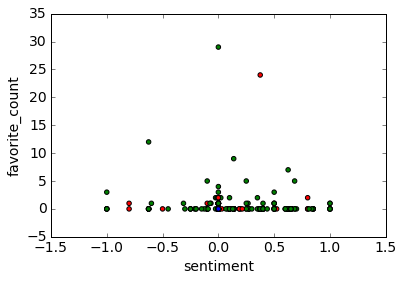

In [47]:
plt.scatter(all_tweets_new.sentiment, all_tweets_new.favorite_count, c=colors[list(all_tweets_new.cluster)])

# add labels
plt.xlabel('sentiment')
plt.ylabel('favorite_count')

In [48]:
'''
it was hard to find a good cluster. There is so much overlap in the tweets.
So many people talking about 2 candidates in the same tweet. 
using Democrat was too binary but using some of the buzzwords (like 'California') and hastags
created some interesting groups but not anything super solid. I felt like this was an intersting
way to explore but I'm not sure how valuable it was.
'''

"\nit was hard to find a good cluster. There is so much overlap in the tweets.\nSo many people talking about 2 candidates in the same tweet. \nusing Democrat was too binary but using some of the buzzwords (like 'California') and hastags\ncreated some interesting groups but not anything super solid. I felt like this was an intersting\nway to explore but I'm not sure how valuable it was.\n"

In [49]:
# 8 Create a column called 'democrat' and assign it to the corresponding candidate name for all the records
# 1 for bernie and hilary and 0 for donald trump
#done in #2

In [50]:
# 9 Estimate classification models using knn and logistic regession.  Dont forget to use cross validation 
    # (do not use cross_val_score because we will want a confusion matrix).
# Use a three class response variable for knn.  For logistic regression predict democrat or republic?
#Assess the pros and cons of both approaches
#Extra Credit: Estimate multinomial regression model using the three class response variable

In [51]:
w = all_tweets_new.drop(['date', 'text', 'language','geocode','coordinates', 'democrat'], axis=1)
x = all_tweets_new.drop(['date', 'text', 'language','geocode','coordinates', 'candidate'], axis=1)                      
y = all_tweets_new['democrat']
z = all_tweets_new['candidate']
#do I ned to drop 'democrat' and 'candidate' from 'x' and 'w'? 
#Otheriwse the data contains the answer you're trying to predict.

In [52]:
# 10 Initialize a classification model (for both knn and logistic)
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [53]:
logreg = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=3) 

In [54]:
# 11 Train your classification model  (for both knn and logistic)
#knn
from sklearn.cross_validation import train_test_split
w_train, w_test, y_train, y_test = train_test_split(w,y)
x_train, x_test, z_train, z_test = train_test_split(x,z)

In [55]:
knn.fit(x_train,z_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [56]:
#logreg
logreg.fit(w_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
# 12 Predict on your test features and targets (for both knn and logistic)
#knn
knn_predict = knn.predict(x_test)
print knn_predict 

[2 3 2 1 2 1 2 2 1 2 1 1 3 1 2 3 1 3 3 1 2 1 2 2 2 3 2 2 1 1 2 2 2 2 1 2 2
 2 1 3 1 2 1 3 2 1 2 1 3 2 2 1 2 2 2 1 2 3 1 1 2 2 2 3 3 3 2 1 1 2 2 2 2 3
 2 3 1 2 1 2 1 1 1 1 2 2 2 2 2 1 2 2 1 2 3 1 2 2 1 1]


In [58]:
#logreg
logreg_predict = logreg.predict(w_test)
print logreg_predict

[1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1
 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0
 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0]


In [59]:
# 13 output your accuracy (for both knn and logistic)
#knn
np.mean(knn_predict == z_test)

0.58999999999999997

In [60]:
#logreg
np.mean(logreg_predict == y_test)

0.67000000000000004

In [61]:
# 14 Create a confusion matrix for your predictions (for both knn and logistic)
#logreg
from sklearn import metrics
print metrics.confusion_matrix(y_test, logreg_predict)


[[29 25]
 [ 8 38]]


In [62]:
#knn
print metrics.confusion_matrix(z_test, knn_predict)

[[14  5  1]
 [15 36  6]
 [ 5  9  9]]


In [63]:
# 15 Who is the easiest candidate to predict? Why do you think? Who is the hardest? Why do you think?
# Write your answers in markdown (for both knn and logistic)
'''
in log reg, much more difficult to predict republicans, most likely due to Mr. Trump. Lots of people are tweeting about him
who aren't actually in favor. Controversial candidate. 
for knn, I'm not totally sure how to read the matrix. I think it is saying Hillary was the easiest to predict and
Donald was the most difficult but I may have that backwards?
'''

"\nin log reg, much more difficult to predict republicans, most likely due to Mr. Trump. Lots of people are tweeting about him\nwho aren't actually in favor. Controversial candidate. \nfor knn, I'm not totally sure how to read the matrix. I think it is saying Hillary was the easiest to predict and\nDonald was the most difficult but I may have that backwards?\n"

In [64]:
# 16 What are some extra features (data points) you would like to add to this data set. Explain in markdown.
# (hint maybe something like a boolean, "has_hashtag")
'''
i would love to sort by different hashtags (satirical, campaign driven, grassroots groups)
there is a lot of noise in here, random spam tweets, nonsense tweets, filter for that
whether a twitter user is male or female
age
'''

'\ni would love to sort by different hashtags (satirical, campaign driven, grassroots groups)\nthere is a lot of noise in here, random spam tweets, nonsense tweets, filter for that\nwhether a twitter user is male or female\nage\n'

In [ ]:
# 17 Try adding extra features to improve the quality of your predictions (for both knn and logistic)